This is the second version of the "Loan Prediction" project, now with more data wrangling and also more models adding as well as more attempts to improve accuracy of the models.

## Importing modules

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [222]:
loan_df = pd.read_csv('loan.csv')
loan_df.shape

(614, 13)

In [223]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [224]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [225]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [226]:
#changing the data of credit history to categorical
loan_df.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [227]:
#dropping loan_id because it doesnt add any necessary information for our model
loan_df.drop(columns = ['Loan_ID'], axis = 1, inplace=True)

## Exploratory Data Analysis

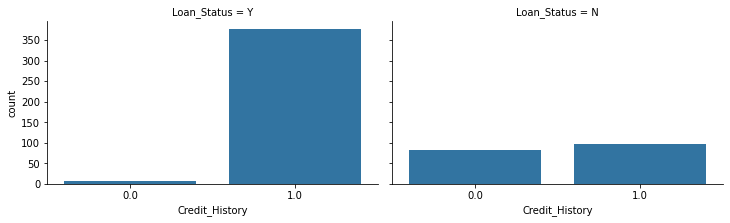

In [228]:
grid = sns.FacetGrid(loan_df, col = 'Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Credit_History')

We can observe that, people with credit history as 1, have more chances to get their loans approved.

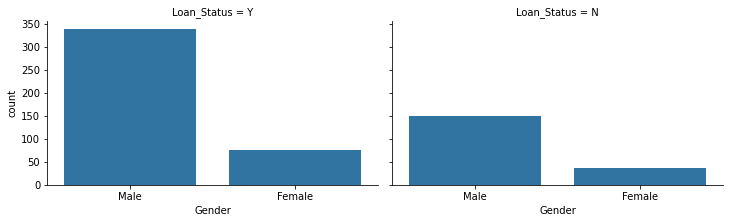

In [229]:
#Gender
grid = sns.FacetGrid(loan_df, col = 'Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Gender')

Males have got a higher chances, of getting their loan approved.

<AxesSubplot:xlabel='Married', ylabel='count'>

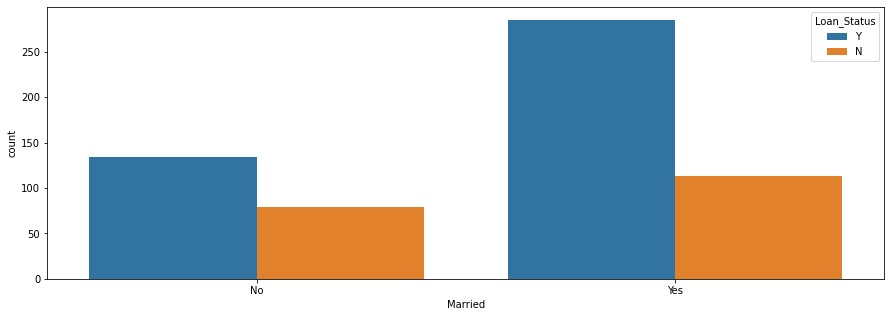

In [230]:
#Married 
plt.figure(figsize = (15,5))
sns.countplot('Married', hue = 'Loan_Status', data = loan_df)

If you are married, you have higher chances of getting the loan.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

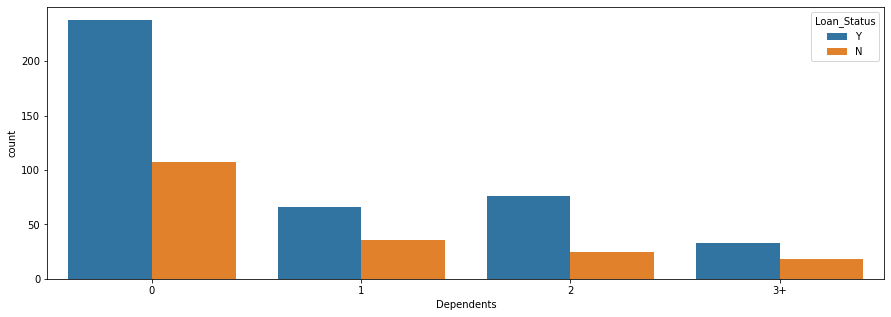

In [231]:
#Dependents
plt.figure(figsize=(15,5))
sns.countplot('Dependents', hue = 'Loan_Status', data = loan_df)

Dependents with value 0 have got higher chances of getting their loan approved.

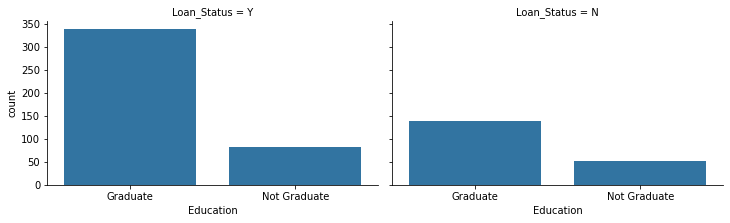

In [232]:
#Education
grid = sns.FacetGrid(loan_df, col = 'Loan_Status',size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Education')

Chances are that if you are educated, you will most likely get your loan approved, but there is not such a huge difference, with the uneducated people as well. 

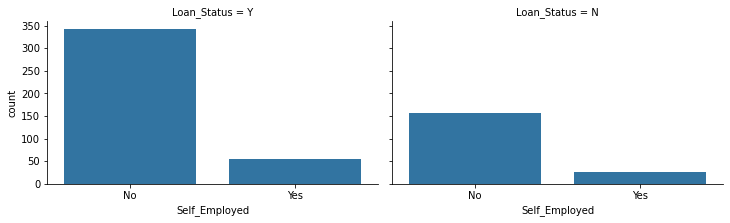

In [233]:
#Self Employed
grid = sns.FacetGrid(loan_df, col = 'Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Self_Employed')

Not a significant pattern

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

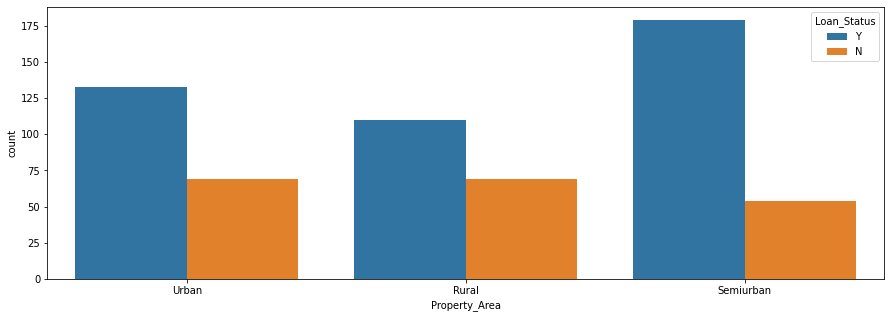

In [234]:
#Property area
plt.figure(figsize=(15,5))
sns.countplot('Property_Area', hue = 'Loan_Status', data = loan_df)

Based on the observations, we can see, that semiurban areas are the most favored areas to approve the loan.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

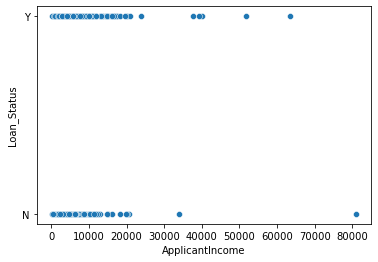

In [235]:
#Relationships between target variable and independent variables
sns.scatterplot(loan_df['ApplicantIncome'], loan_df['Loan_Status'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

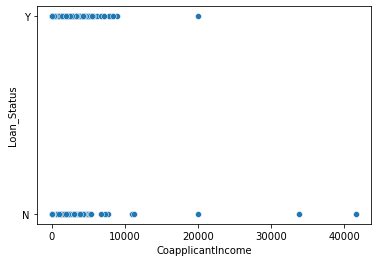

In [236]:
sns.scatterplot(loan_df['CoapplicantIncome'], loan_df['Loan_Status'])

In [237]:
#Missing values
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [238]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [239]:
#categorical values gender, married, dependents, self_employed need to fill null values with mode
#numerical values loan amound, loan amount term and credit history will have them fill with mean
#In our interest since credit history takes only values 0 and 1 its better to transform it into categorical and 
#fill the null values with the mode

loan_df['Credit_History'] = loan_df['Credit_History'].astype('O')

In [240]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [241]:
cat_null = ['Gender', 'Married','Dependents','Self_Employed','Credit_History']
num_null = ['LoanAmount','Loan_Amount_Term']

In [242]:
#loan_df['Gender'].mode()[0]

In [243]:
for i in cat_null:
    loan_df[i] = loan_df[i].fillna(loan_df[i].mode()[0])

In [244]:
for i in num_null:
    loan_df[i] = loan_df[i].fillna(loan_df[i].mean())

In [245]:
loan_df.isnull().sum() #no missing values now

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

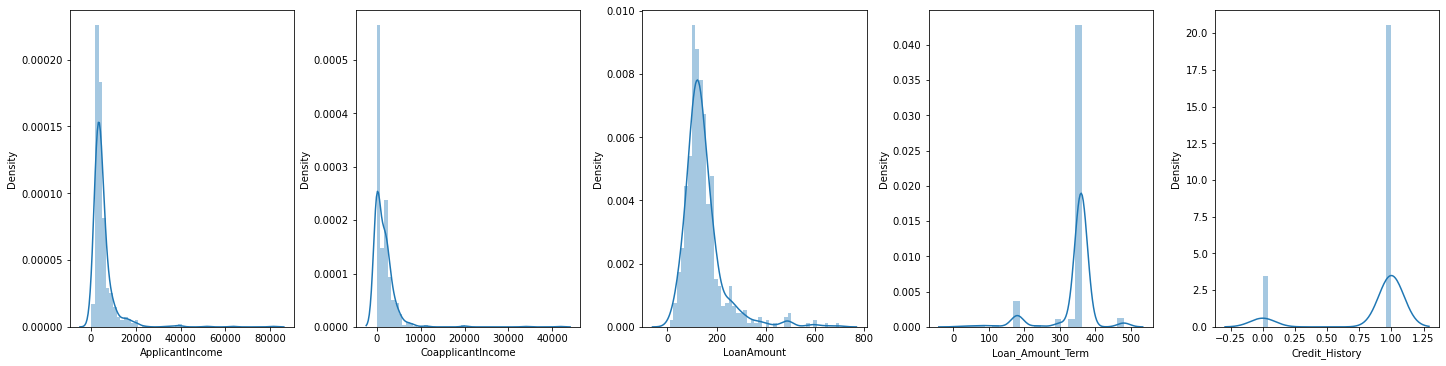

In [246]:
index = 0

ncols = [x for x in loan_df.columns if loan_df.dtypes[x] != 'object']
length_ncols_numbers = len(ncols)
fig, ax = plt.subplots(nrows = 1, ncols = length_ncols_numbers, figsize = (20,5))

for x in loan_df.columns:
    if(loan_df.dtypes[x] != 'object'):
        sns.distplot(loan_df[x], ax = ax[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0) 

In [247]:
df = loan_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

for k, v in df.items():

    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    
    iqr = q3 - q1
    
    v_col = v[(v<= (q1 - (1.5 * iqr))) | (v >= (q3 + (1.5 * iqr)))]
    
    percentage = (v_col.shape[0] * 100) / df.shape[0]
    
    print("Outliers of ",k," are: ",round(percentage,2),"%")

Outliers of  ApplicantIncome  are:  8.14 %
Outliers of  CoapplicantIncome  are:  2.93 %
Outliers of  LoanAmount  are:  6.68 %
Outliers of  Loan_Amount_Term  are:  100.0 %


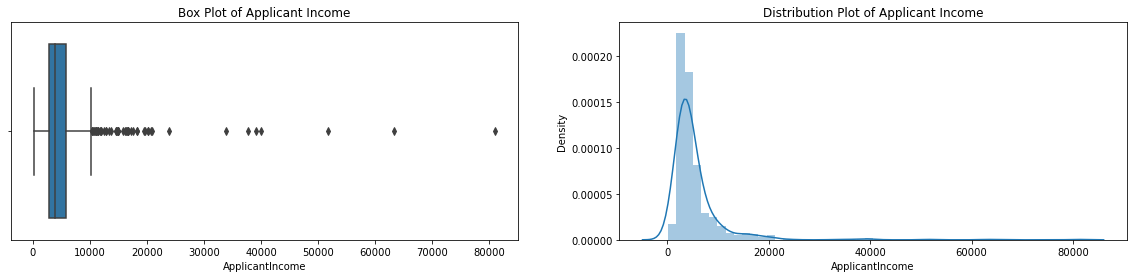

In [248]:
# we basically need to remove the outliers from those columns

#ApplicantIncome
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.boxplot(loan_df['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')


plt.subplot(1,2,2)
sns.distplot(loan_df['ApplicantIncome'])
plt.title('Distribution Plot of Applicant Income')

plt.show()



In [249]:
q1 = loan_df['ApplicantIncome'].quantile(0.25)
q3 = loan_df['ApplicantIncome'].quantile(0.75)


IQR = q3 - q1


AI_1 = q1 - 1.5 * IQR
AI_3 = q3 + 1.5 * IQR


loan_df[loan_df['ApplicantIncome'] < AI_1] #no data

AI_3

10171.25

In [250]:
loan_df[loan_df['ApplicantIncome']>AI_3]['ApplicantIncome'].value_counts().sort_index() #range is from 10408 - 81000

10408    1
10416    1
10513    1
10750    1
10833    1
11000    1
11146    1
11250    1
11417    1
11500    1
11757    1
12000    2
12500    1
12841    1
12876    1
13262    1
13650    1
14583    2
14683    1
14866    1
14880    1
14999    1
15000    1
15759    1
16120    1
16250    1
16525    1
16666    1
16667    1
16692    1
17263    1
17500    1
18165    1
18333    1
19484    1
19730    1
20166    1
20233    1
20667    1
20833    1
23803    1
33846    1
37719    1
39147    1
39999    1
51763    1
63337    1
81000    1
Name: ApplicantIncome, dtype: int64

In [251]:
#dropping values from 10408 - 81000

loan_df = loan_df[~(loan_df['ApplicantIncome'] >= 10408)]

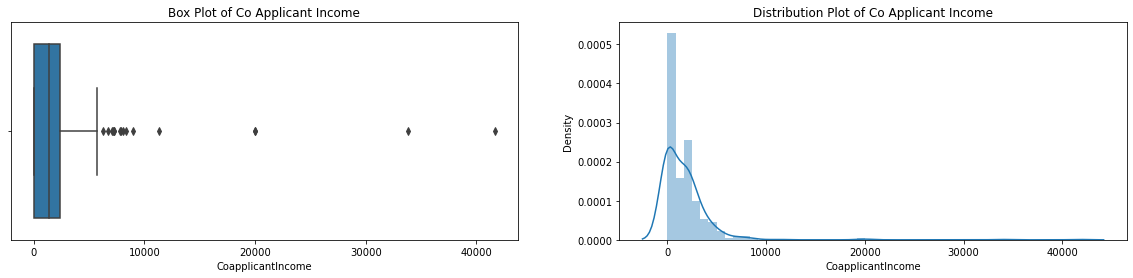

In [252]:
#CoapplicantIncome


# we basically need to remove the outliers from those columns


plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.boxplot(loan_df['CoapplicantIncome'])
plt.title('Box Plot of Co Applicant Income')


plt.subplot(1,2,2)
sns.distplot(loan_df['CoapplicantIncome'])
plt.title('Distribution Plot of Co Applicant Income')

plt.show()

In [253]:
q1 = loan_df['CoapplicantIncome'].quantile(0.25)
q3 = loan_df['CoapplicantIncome'].quantile(0.75)


IQR = q3 - q1


AI_1 = q1 - 1.5 * IQR
AI_3 = q3 + 1.5 * IQR


loan_df[loan_df['CoapplicantIncome'] > AI_3]['CoapplicantIncome'].value_counts().sort_index() #no data

loan_df = loan_df[~(loan_df['CoapplicantIncome'] >= 6250)]

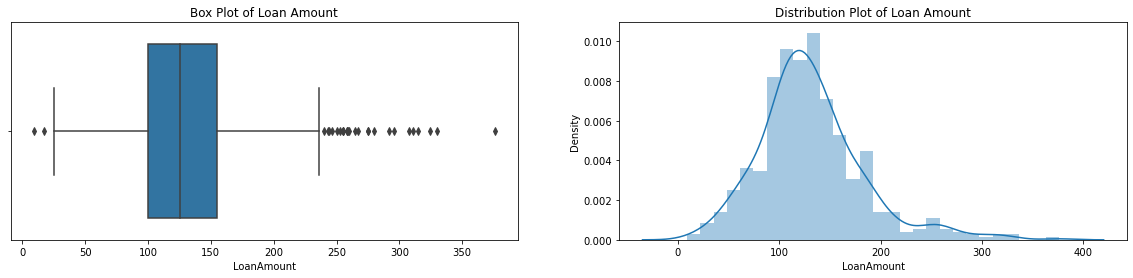

In [254]:
#Loan Amount

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.boxplot(loan_df['LoanAmount'])
plt.title('Box Plot of Loan Amount')


plt.subplot(1,2,2)
sns.distplot(loan_df['LoanAmount'])
plt.title('Distribution Plot of Loan Amount')

plt.show()
#It follows a normal distribution, but it would be better to remove outliers left

In [255]:
q1 = loan_df['LoanAmount'].quantile(0.25)
q3 = loan_df['LoanAmount'].quantile(0.75)


IQR = q3 - q1


AI_1 = q1 - 1.5 * IQR
AI_3 = q3 + 1.5 * IQR


loan_df[loan_df['LoanAmount'] > AI_3]['LoanAmount'].value_counts().sort_index() #no data

loan_df = loan_df[~(loan_df['LoanAmount'] >= 300)]

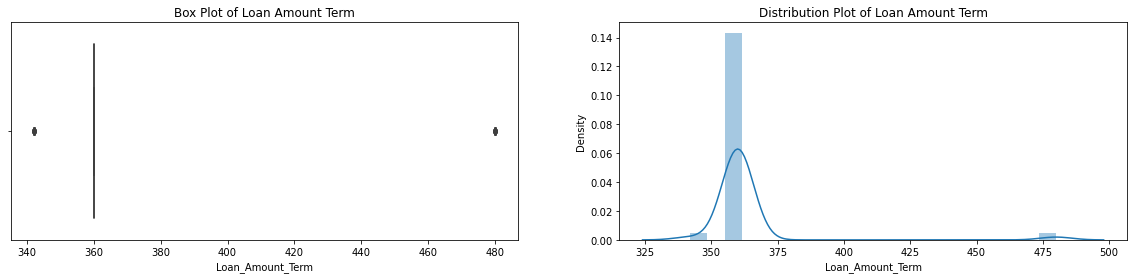

In [260]:
#Loan Amount Term

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.boxplot(loan_df['Loan_Amount_Term'])
plt.title('Box Plot of Loan Amount Term')


plt.subplot(1,2,2)
sns.distplot(loan_df['Loan_Amount_Term'])
plt.title('Distribution Plot of Loan Amount Term')

plt.show()

In [261]:
q1 = loan_df['Loan_Amount_Term'].quantile(0.25)
q3 = loan_df['Loan_Amount_Term'].quantile(0.75)


IQR = q3 - q1


AI_1 = q1 - 1.5 * IQR
AI_3 = q3 + 1.5 * IQR


loan_df[loan_df['Loan_Amount_Term'] > AI_3]['Loan_Amount_Term'].value_counts().sort_index() #no data
#loan_df[loan_df['Loan_Amount_Term'] < AI_1]['Loan_Amount_Term'].value_counts().sort_index()

#loan_df = loan_df[~(loan_df['Loan_Amount_Term'] <= 300)]

480.0    14
Name: Loan_Amount_Term, dtype: int64

In [262]:
#Encode the loan_status in 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

loan_df['Loan_Status'] = le.fit_transform(loan_df['Loan_Status'])

In [263]:
#One hot encoding for categorical variables
cols = [x for x in loan_df.columns if loan_df.dtypes[x] == 'object']

cols

loan_df = pd.get_dummies(loan_df, columns = cols)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 19.3 KB


In [267]:
#Standard scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

cols = df.columns


for i in cols:
    
    loan_df[cols] = ss.fit_transform(loan_df[cols])


In [268]:
loan_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.953208,-0.944665,0.326612,-0.145062,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.274704,0.127564,-0.063365,-0.145062,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,-0.573694,-0.944665,-1.376552,-0.145062,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,-0.797182,0.731937,-0.232809,-0.145062,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,1.034136,-0.944665,0.211981,-0.145062,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [269]:
#Input splitting
X = loan_df.drop(columns = ['Loan_Status'], axis = 1)
y = loan_df['Loan_Status']

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [280]:
#we will use 4 different models for training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [287]:
#loss function
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [288]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)

In [289]:
train_eval_models(models, X_train, y_train)

LogisticRegression :
  pre: 0.814
  rec: 0.981
  f1: 0.890
  loss: 5.847
  acc: 0.831
------------------------------
KNeighborsClassifier :
  pre: 0.786
  rec: 0.985
  f1: 0.874
  loss: 6.836
  acc: 0.802
------------------------------
SVC :
  pre: 0.815
  rec: 0.989
  f1: 0.894
  loss: 5.667
  acc: 0.836
------------------------------
DecisionTreeClassifier :
  pre: 0.803
  rec: 0.989
  f1: 0.886
  loss: 6.116
  acc: 0.823
------------------------------
